### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#drop 'car' as uniformative 12,576 are NULL
data['car'].value_counts(dropna=False) 

car
NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: count, dtype: int64

In [5]:
#All entries are "1"
data['toCoupon_GEQ5min'].value_counts(dropna=False) 

toCoupon_GEQ5min
1    12684
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
#drop 'car' as uniformative - 12,576 are NULL, fields that are filled out do not have high enough variance
#drop 'toCoupon_GEQ5min' since all entries are "1"
#rename "passanger" column to "passenger"
data = data.drop(columns=['car','toCoupon_GEQ5min'])
data = data.rename(columns={'passanger': 'passenger'}) #passanger column is misspelled

4. What proportion of the total observations chose to accept the coupon? 



In [7]:
#56% of customers accepted the coupon
acceptance_rate = data['Y'].sum()/data['Y'].count() 
print('acceptance rate is ' + f'{acceptance_rate:.2%}')

acceptance rate is 56.84%


5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon Acceptance'}, xlabel='coupon type', ylabel='coupon acceptance'>

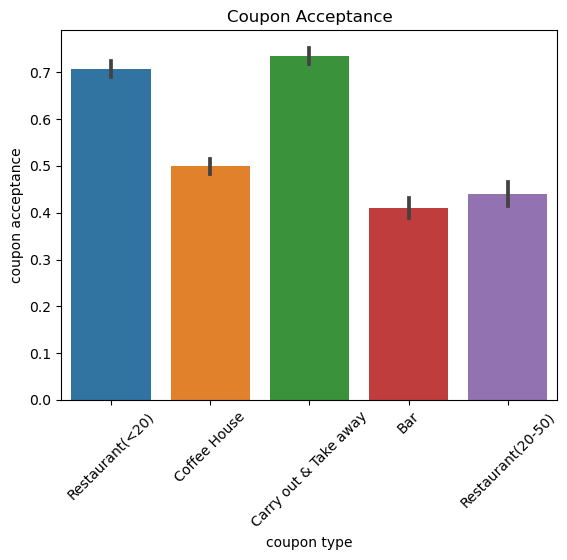

In [8]:
coupon_bar = sns.barplot(data, x = 'coupon', y = 'Y')
coupon_bar.set(title='Coupon Acceptance')
coupon_bar.set(xlabel='coupon type', ylabel='coupon acceptance')
plt.xticks(rotation=45)
coupon_bar

6. Use a histogram to visualize the temperature column.

[Text(0.5, 1.0, 'temperature counts')]

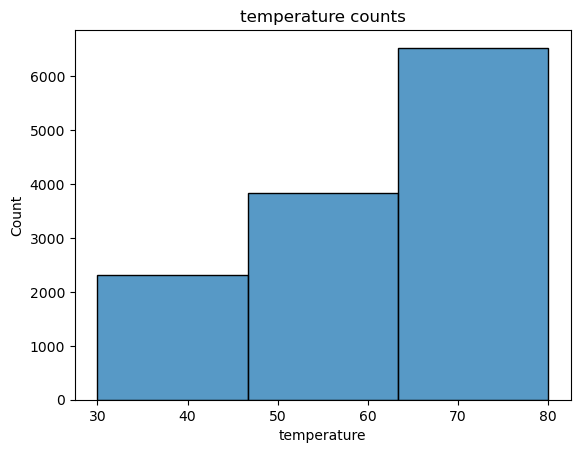

In [9]:
sns.histplot(data=data,x='temperature',bins=3).set(title='temperature counts')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
df_bar = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [11]:
#41% of customers accepted the coupon
bar_acceptance_rate = df_bar['Y'].sum()/df_bar['Y'].count() 
print('Bar coupon acceptance rate is ' + f'{bar_acceptance_rate:.2%}')

Bar coupon acceptance rate is 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<Axes: title={'center': 'Bar acceptance based on visits per week'}, xlabel='bar frequency', ylabel='coupon acceptance'>

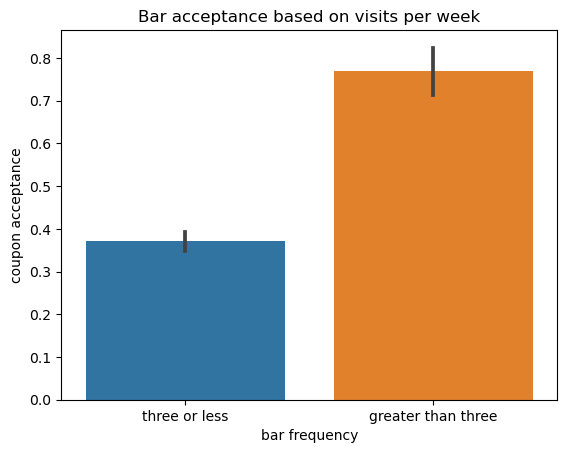

In [13]:
"""
1) Those who go to the bar more than 3 times per month have a bar coupon acceptance rate of 77%
2) Those who go to the bar 3 or less times per month have a bar coupon acceptance rate of 37%
3) Those who go to the bar more than 3 times per month arre more than twice as likely to accept a bar coupon
"""

bar_three_or_less = ['never','less1','1~3']
bar_more_than_three = ['4~8','gt8']

#Since the warning from pandas "SettingWithCopyWarning" is a false-positive here, I have disabled it.
#This is because I am creating a new column on the data set since df_bar is already a copy of a dataset
pd.options.mode.chained_assignment = None

df_bar.loc[(df_bar.loc[:,'Bar'].isin(bar_three_or_less)), 'bar_frequency'] = 'three or less'
df_bar.loc[(df_bar.loc[:,'Bar'].isin(bar_more_than_three)), 'bar_frequency'] = 'greater than three'

bar_acceptance_rate = df_bar.groupby('bar_frequency')['Y'].mean()

bar_acceptance1 = sns.barplot(
    data=df_bar[df_bar['Bar'].notna()]
    , x = 'bar_frequency'
    , y = 'Y')
bar_acceptance1.set(xlabel='bar frequency', ylabel='coupon acceptance')
bar_acceptance1.set(title='Bar acceptance based on visits per week')
bar_acceptance1

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<Axes: title={'center': 'Bar acceptance based on age and frequency of visits'}, xlabel='Demographic', ylabel='coupon acceptance'>

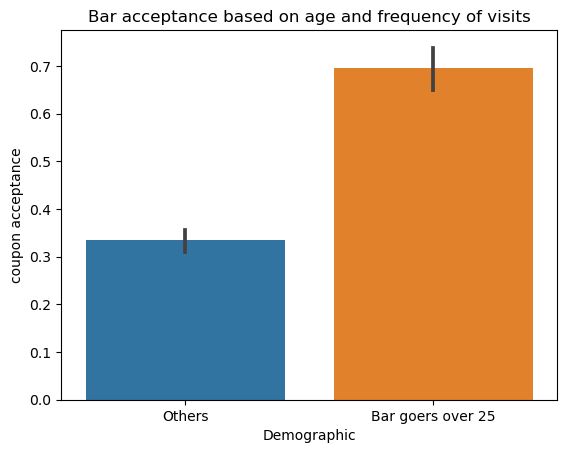

In [14]:
"""
1) Those who go to the bar more than once a month and are over 25 have a bar coupon acceptance rate of 70%
2) Others who were offered a bar coupon accepted 34% of the time
3) Those who go to the bar more than once a month and are over 25 have a bar coupon 
    acceptance rate twice as high as others who were offered a bar coupon
"""

over_25 = ['26','31','36','41','46','50plus']
bar_more_than_1 = ['1~3','4~8','gt8']

df_bar.loc[
    (df_bar.loc[:,'Bar'].isin(bar_more_than_1) & df_bar.loc[:,'age'].isin(over_25))
    , 'over25_more_than_1'] = 'Bar goers over 25'
df_bar.loc[
    (~df_bar.loc[:,'Bar'].isin(bar_more_than_1) | ~df_bar.loc[:,'age'].isin(over_25))
    , 'over25_more_than_1'] = 'Others'

bar_acceptance_rate2 = df_bar.groupby('over25_more_than_1')['Y'].mean()

bar_acceptance2 = sns.barplot(data=df_bar[df_bar.loc[:,'Bar'].notna()], x = 'over25_more_than_1', y = 'Y')
bar_acceptance2.set(xlabel='Demographic', ylabel='coupon acceptance')
bar_acceptance2.set(title='Bar acceptance based on age and frequency of visits')
bar_acceptance2


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


acceptance rate in selection 71.79%
acceptance rate not in selection 37.70%


<Axes: title={'center': 'Bar acceptance of bar-goer, with non-kid passenger, not in forestry'}, xlabel='Demographic', ylabel='coupon acceptance'>

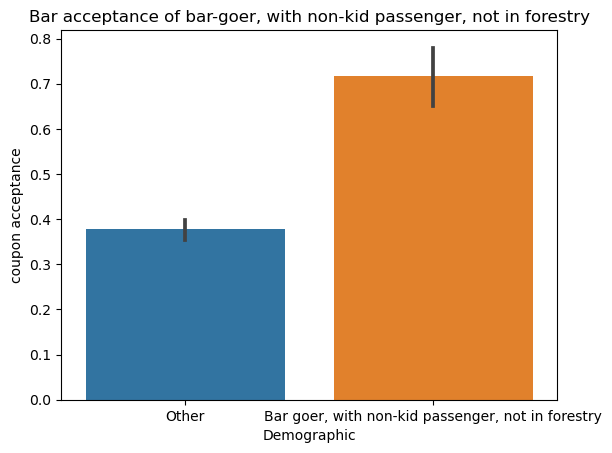

In [15]:
"""
1) Those who meet the specified criteria have a bar coupon acceptance rate of 72%
2) Others who were offered a bar coupon accepted 38% of the time
3) Those who meet the specified criteria have a significantly higher likelihood
    of accepting a bar coupon
"""

#bar_more_than_1 & pass_not_kid & not_FFF
bar_more_than_1 = ['1~3','4~8','gt8']
pass_not_kid = ['Friend(s)','Partner']
occ_fff = ['Farming Fishing & Forestry']

df_bar.loc[
    (
        df_bar.loc[:,'Bar'].isin(bar_more_than_1)
        & df_bar.loc[:,'passenger'].isin(pass_not_kid)
        & ~df_bar.loc[:,'occupation'].isin(occ_fff)
    ), 'new_criteria'] = 'Bar goer, with non-kid passenger, not in forestry'
df_bar.loc[
    (
        ~df_bar.loc[:,'Bar'].isin(bar_more_than_1)
        | ~df_bar.loc[:,'passenger'].isin(pass_not_kid)
        | df_bar.loc[:,'occupation'].isin(occ_fff)
    ), 'new_criteria'] = 'Other'
df_bar.loc[
    (
        df_bar.loc[:,'Bar'].isna()
    ), 'new_criteria'] = 'NaN'

pct_accepted_included = (
    df_bar[df_bar['new_criteria'] == 'Bar goer, with non-kid passenger, not in forestry']['Y'].sum()
    / df_bar[df_bar['new_criteria'] == 'Bar goer, with non-kid passenger, not in forestry']['Y'].count())

pct_accepted_not_included = (
    df_bar[df_bar.loc[:,'new_criteria'] == 'Other']['Y'].sum()
    / df_bar[df_bar.loc[:,'new_criteria'] == 'Other']['Y'].count())

print('acceptance rate in selection ' + f'{pct_accepted_included:.2%}')
print('acceptance rate not in selection ' + f'{pct_accepted_not_included:.2%}')

bar_acceptance3 = sns.barplot(data=df_bar[df_bar.loc[:,'Bar'].notna()], x = 'new_criteria', y = 'Y')
bar_acceptance3.set(xlabel='Demographic', ylabel='coupon acceptance')
bar_acceptance3.set(title='Bar acceptance of bar-goer, with non-kid passenger, not in forestry')
bar_acceptance3


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [16]:
#bar_more_than_1 & pass_not_kid & not_FFF
bar_more_than_1 = ['1~3','4~8','gt8']
pass_not_kid = ['Friend(s)','Partner']
widowed = ['Widowed']
under_30 = ['31','36','41','46','50plus']
more_than_4 = ['4~8','gt8']
income_less_than_50k = ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999']

#person 1
df_bar.loc[
    (
        (df_bar.loc[:,'Bar'].isin(bar_more_than_1) #can be NaN
        & df_bar.loc[:,'passenger'].isin(pass_not_kid)
        & ~df_bar.loc[:,'maritalStatus'].isin(widowed))
    ), 'q6 comparison person 1'] = 'Y'
df_bar.loc[
    (
        (~df_bar.loc[:,'Bar'].isin(bar_more_than_1) #can be NaN
        | ~df_bar.loc[:,'passenger'].isin(pass_not_kid)
        | df_bar.loc[:,'maritalStatus'].isin(widowed))
    ), 'q6 comparison person 1'] = 'N'
df_bar.loc[
    (
        (df_bar.loc[:,'Bar'].isna())
    ), 'q6 comparison person 1'] = 'NaN'

#person 2
df_bar.loc[
    (
        (df_bar.loc[:,'Bar'].isin(bar_more_than_1)
        & df_bar.loc[:,'age'].isin(under_30))
    ), 'q6 comparison person 2'] = 'Y'
df_bar.loc[
    (
        (~df_bar.loc[:,'Bar'].isin(bar_more_than_1)
        | ~df_bar.loc[:,'age'].isin(under_30))
    ), 'q6 comparison person 2'] = 'N'
df_bar.loc[
    (
        (df_bar.loc[:,'Bar'].isna())
    ), 'q6 comparison person 2'] = 'NaN'

#person 3
df_bar.loc[
    (
        (df_bar.loc[:,'RestaurantLessThan20'].isin(more_than_4) #can be NaN
        & df_bar.loc[:,'income'].isin(income_less_than_50k))
    ), 'q6 comparison person 3'] = 'Y'
df_bar.loc[
    (
        (~df_bar.loc[:,'RestaurantLessThan20'].isin(more_than_4) #can be NaN
        | ~df_bar.loc[:,'income'].isin(income_less_than_50k))
    ), 'q6 comparison person 3'] = 'Y'
df_bar.loc[
    (
        (df_bar.loc[:,'RestaurantLessThan20'].isna())
    ), 'q6 comparison person 3'] = 'NaN'

pct_accepted_person1 = (
    df_bar[df_bar.loc[:,'q6 comparison person 1'] == 'Y']['Y'].sum()
    / df_bar[df_bar.loc[:,'q6 comparison person 1'].isin(['Y','N'])]['Y'].count())
pct_accepted_person2 = (
    df_bar[df_bar.loc[:,'q6 comparison person 2'] == 'Y']['Y'].sum()
    / df_bar[df_bar.loc[:,'q6 comparison person 2'].isin(['Y','N'])]['Y'].count())
pct_accepted_person3 = (
    df_bar[df_bar.loc[:,'q6 comparison person 3'] == 'Y']['Y'].sum()
    / df_bar[df_bar.loc[:,'q6 comparison person 3'].isin(['Y','N'])]['Y'].count())

print('acceptance rate of person 1 is ' + f'{pct_accepted_person1:.2%}')
print('acceptance rate of person 2 is ' + f'{pct_accepted_person2:.2%}')
print('acceptance rate of person 3 is ' + f'{pct_accepted_person3:.2%}')

#Person 3 is most likely to accept a coupon for a bar

acceptance rate of person 1 is 7.01%
acceptance rate of person 2 is 8.07%
acceptance rate of person 3 is 40.87%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [17]:
#Widowed people don't tend to accept bar coupons
#people who frequently go to cheap restaurants and/or bars are likely to accept a bar coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigate Coffee House Coupon Acceptance

In [18]:
df_coffee = data[data['coupon'] == 'Coffee House']

Calculate acceptance of coffee house coupons

In [19]:
#41% of customers accepted the coupon
coffee_acceptance_rate = df_coffee['Y'].sum()/df_coffee['Y'].count() 
print('Coffee house coupon acceptance rate is ' + f'{coffee_acceptance_rate:.2%}')

Coffee house coupon acceptance rate is 49.92%


Consider individuals under 21 who are offered a coupon that expires in 1 day

<Axes: title={'center': 'Coffee acceptance - under 21 & 1 day expiration'}, xlabel='Demographic', ylabel='coupon acceptance'>

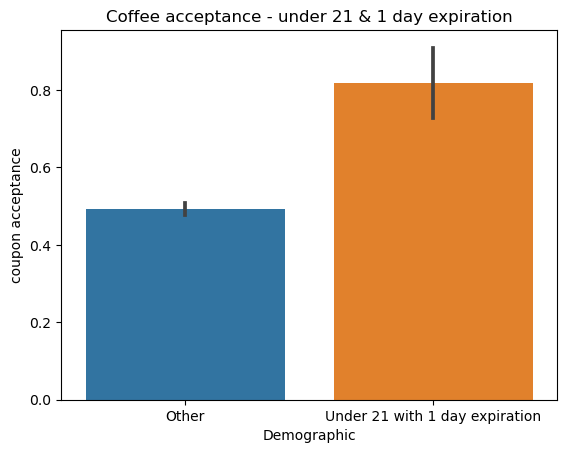

In [20]:
#Individuals under 21 who are offered a 1 day coupon are 82% likely to accept the coupon
#This is 32% higher than others

df_coffee.loc[
    (df_coffee['age'].isin(['below21']) & df_coffee['expiration'].isin(['1d']))
    , 'coffee_criteria1'] = 'Under 21 with 1 day expiration'
df_coffee.loc[
    (~df_coffee['age'].isin(['below21']) | ~df_coffee['expiration'].isin(['1d']))
    , 'coffee_criteria1'] = 'Other'

coffee_acceptance_rate1 = df_coffee.groupby('coffee_criteria1')['Y'].mean()
coffee_acceptance_rate1

coffee_acceptance1 = sns.barplot(data=df_coffee, x = 'coffee_criteria1', y = 'Y')
coffee_acceptance1.set(xlabel='Demographic', ylabel='coupon acceptance')
coffee_acceptance1.set(title='Coffee acceptance - under 21 & 1 day expiration')
coffee_acceptance1


<Axes: title={'center': 'Coffee acceptance - based on time of day'}, xlabel='Time of Day', ylabel='coupon acceptance'>

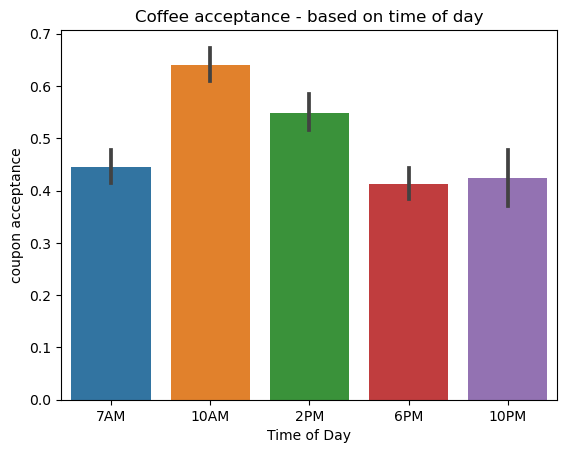

In [21]:
#Time of day is impactful as well. We can see that coupons are most accepted at 10AM
#coupons are least accepted at night
coffee_acceptance_time = sns.barplot(data=df_coffee, x = 'time', y = 'Y', order = ['7AM','10AM','2PM','6PM','10PM'])
coffee_acceptance_time.set(xlabel='Time of Day', ylabel='coupon acceptance')
coffee_acceptance_time.set(title='Coffee acceptance - based on time of day')
coffee_acceptance_time